#Proyecto 1 Análisis Integral de Riesgos



Elegir como datos de entrenamiento (TRAIN) y datos de prueba (TEST) los que se
encuentren en la hoja con el número de su equipo, es decir, equipo 1 tomaría los datos de
la hoja E1.
- Elaborar un análisis individual de las variables edad, género y salario. ¿Qué variables son
significativas para el modelo y por qué?
- Estandarizar las variables para evitar problemas de escala mediante la resta de le media y
dividir entre la desviación estándar, es decir, (xi – media) / SD
- Generar un modelo de regresión logística para clasificar los clientes con los datos de train
o Obtener las betas del modelo
o Escalar el score a un puntaje positivo
o Validar el score mediante las pruebas KS, índice de Gini, IV, y ROC/AUC.
o Obtener el punto de corte del score
- Contrastar los datos de Test para saber como fue clasificado el conjunto de clientes en el
modelo.
- Hacer una tabla/matriz de confusión con los resultados del modelo y calcular las tasas de
Verdaderos Positivos, Verdaderos Negativos, Falso Positivos, Falsos Negativos, Acurrancy
Ratio y Error.

In [ ]:
#Llamamos las bibliotecas que utilizaremos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import scipy as sp
import seaborn as sns

In [ ]:
#Conectamos Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importamos los datos
Datos = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Proyecto 1 Datos.xlsm',sheet_name='E1')
print(Datos.head())

    User ID  Gender  Age  EstimatedSalary USD  Purchased Sample     Age S  \
0  15624510    Male   19                19000          0  Train -1.779569   
1  15810944    Male   35                20000          0  Train -0.253270   
2  15668575  Female   26                43000          0  Train -1.111813   
3  15603246  Female   27                57000          0  Train -1.016419   
4  15804002    Male   19                76000          0   Test -1.779569   

   EstimatedSal S  Unnamed: 8  Age Mean     Age SD  ES Mean         ES SD  
0       -1.488183         NaN    37.655  10.482877  69742.5  34096.960282  
1       -1.458854         NaN       NaN        NaN      NaN           NaN  
2       -0.784307         NaN       NaN        NaN      NaN           NaN  
3       -0.373714         NaN       NaN        NaN      NaN           NaN  
4        0.183521         NaN       NaN        NaN      NaN           NaN  


In [ ]:
#Filtramos los datos que necesitamos
Datos1 = Datos[Datos['Sample']=='Train'] #Se seleccionan los datos de Train
print(Datos1.head())

    User ID  Gender  Age  EstimatedSalary USD  Purchased Sample     Age S  \
0  15624510    Male   19                19000          0  Train -1.779569   
1  15810944    Male   35                20000          0  Train -0.253270   
2  15668575  Female   26                43000          0  Train -1.111813   
3  15603246  Female   27                57000          0  Train -1.016419   
5  15728773    Male   27                58000          0  Train -1.016419   

   EstimatedSal S  Unnamed: 8  Age Mean     Age SD  ES Mean         ES SD  
0       -1.488183         NaN    37.655  10.482877  69742.5  34096.960282  
1       -1.458854         NaN       NaN        NaN      NaN           NaN  
2       -0.784307         NaN       NaN        NaN      NaN           NaN  
3       -0.373714         NaN       NaN        NaN      NaN           NaN  
5       -0.344386         NaN       NaN        NaN      NaN           NaN  


##Análisis de las variables Edad, Salario y Género

In [ ]:
#Análisis de las variables Edad y Salario
print(Datos['Age'].describe())
print(Datos['EstimatedSalary USD'].describe())

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64
count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary USD, dtype: float64


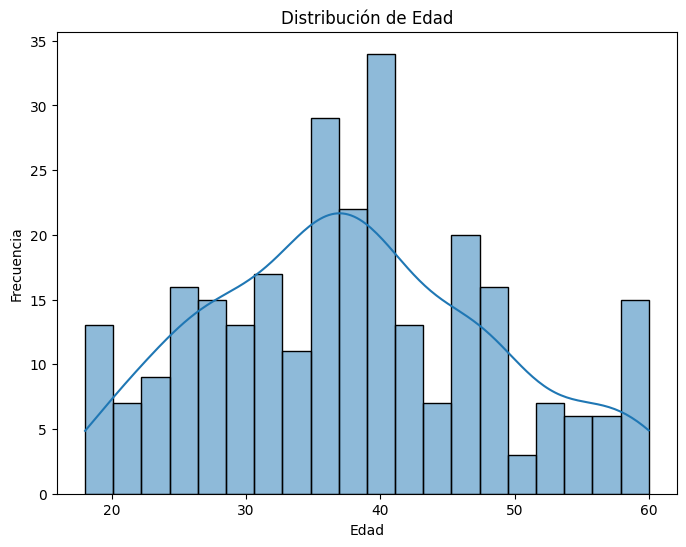

In [ ]:
#Análisis Age
plt.figure(figsize=(8, 6))
sns.histplot(Datos1['Age'], bins=20, kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

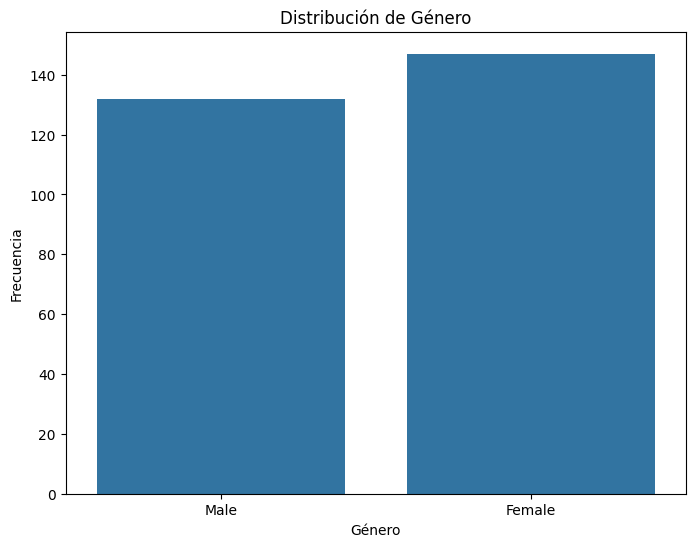

In [ ]:
#Análisis Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=Datos1)
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

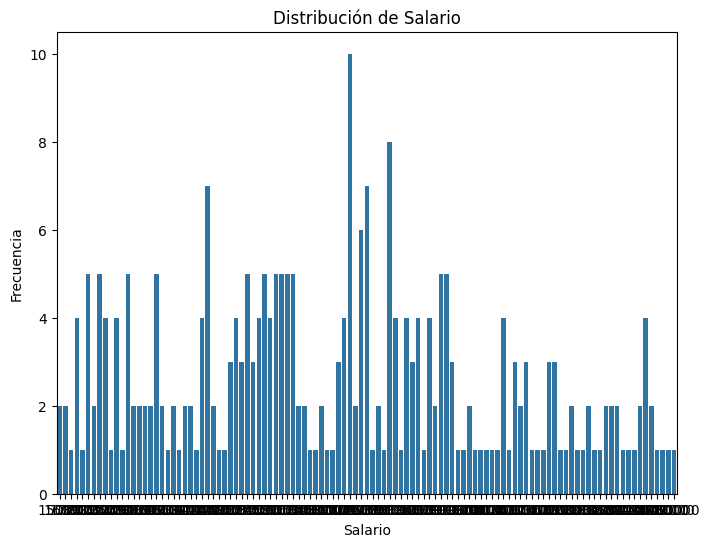

In [ ]:
#Análisis EstimatedSalary USD
plt.figure(figsize=(8, 6))
sns.countplot(x='EstimatedSalary USD', data=Datos1)
plt.title('Distribución de Salario')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
#Vamos a comprobar la significancia de la variable Gender a través de un test de
#independencia Chi-cuadrada para comprobar si el género afecta a la compra.
from scipy.stats import chi2_contingency
# Se crea la tabla de contingencia
tabla_contingencia = pd.crosstab(Datos1['Gender'], Datos1['Purchased'])
# Aplicar el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"p-valor: {p}")


p-valor: 0.3671286024881423


In [ ]:
#Sea el valor de alpha = 0.05, recordemos que para rechazar Ho: p-valor < alpha
#Dado que el valor p es mayor que 0.05, no habría evidencia estadística suficiente para afirmar que el sexo afecta la compra.

In [ ]:
#Ahora seleccionamos las variables que necesitamos
#Variables independientes
x1 = Datos1['Age S']
x2 = Datos1['EstimatedSal S']
x = np.column_stack((x1,x2))
#Variable dependiente
y1 = Datos1['Purchased']

                   Age S  EstimatedSal S
Age S           1.000000        0.181501
EstimatedSal S  0.181501        1.000000


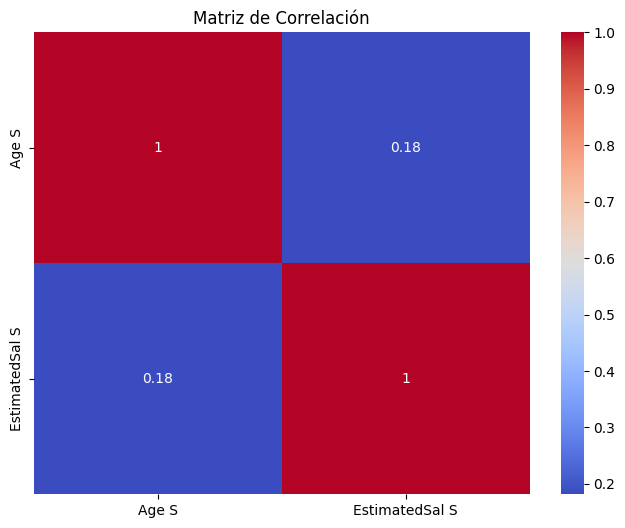

In [ ]:
#Comprobar la correlacion entre las variables
df = pd.DataFrame(x)
df.columns = ['Age S', 'EstimatedSal S']
correlacion = df.corr()
print(correlacion)

#Creamos un gráfico para observar de mejor manera la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

##Modelo de regresión logística

In [ ]:
#Generamos el modelo de regresión logística
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()
m1.fit(x,y1)

LogisticRegression()

In [ ]:
#Obtenemos las betas del modelo
coef = m1.coef_
print(m1.intercept_)
coefdf = pd.DataFrame(coef,columns=['Age S','EstimatedSal S'])
coefdf

#Se obtienen los coeficientes del modelo y el intercepto, que indican la influencia de cada variable en la predicción.

[-0.94487734]


,Age S,EstimatedSal S
0,2.239409,1.275435


In [ ]:
#Calculamos el score
m11 = 2.239409*x1 + 1.275435*x2 -0.94487734
print(m11)

0     -6.828140
1     -3.372727
2     -4.435015
3     -3.697704
5     -3.660298
         ...   
394   -1.059386
395   -0.237319
397   -0.168345
398   -2.672822
399    0.216527
Length: 279, dtype: float64


In [ ]:
#Escalamos el score a un puntaje entre 400 y 1200
m11 = (m11 - m11.min()) / (m11.max() - m11.min()) * (1200 - 400) + 400
print(m11)

0      400.000000
1      609.683041
2      545.220761
3      589.962631
5      592.232527
          ...    
394    750.062282
395    799.947399
397    804.132863
398    652.155014
399    827.487882
Length: 279, dtype: float64


In [ ]:
#Normalizamos el score
EScore = (m11 - m11.min()) / (m11.max() - m11.min())
print(EScore)

0      0.000000
1      0.262104
2      0.181526
3      0.237453
5      0.240291
         ...   
394    0.437578
395    0.499934
397    0.505166
398    0.315194
399    0.534360
Length: 279, dtype: float64


#Validación del score#

In [ ]:
#Prueba KS
from scipy.stats import ks_2samp
ks_2samp(EScore,y1)

KstestResult(statistic=0.6164874551971327, pvalue=7.48437984293715e-50, statistic_location=0.0, statistic_sign=-1)

El resultado indica que el modelo separa bien las dos clases, ya que el estadístico KS es relativamente alto (0.62) y el valor p es extremadamente bajo, lo que implica que es muy improbable que esta diferencia se deba al azar. Por lo tanto, podemos confiar en que el modelo está funcionando bien en términos de distinguir las dos clases.

In [ ]:
#Calculamos AUC-ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(y1,EScore)

0.9292998145926492

Tenemos un valor cercano a 1 lo que indica una excelente capacidad para distinguir entre clases.

In [ ]:
#Indice de Gini
indice  = 2*roc_auc_score(y1,EScore)-1
print(indice)

0.8585996291852984


Obtuvimos un valor cercano a 1 lo cual indica una alta capacidad para discriminar entre clases positivas y negativas.

In [ ]:
#IV
data = pd.DataFrame({
    'score': EScore,   # Scores predichos
    'y_true': y1       # Valores verdaderos (0 o 1)
})

#Dividimos en 10 bins
data['bin'] = pd.qcut(data['score'], q=10, duplicates='drop')  # 'q' es para los cuantiles

# Agrupar por bin para contar eventos y no eventos
grouped = data.groupby('bin').agg({
    'y_true': ['count', 'sum']  # sum() nos da los eventos (1s), count() es el total por bin
})

# Renombrar las columnas para mayor claridad
grouped.columns = ['total', 'eventos']
grouped['no_eventos'] = grouped['total'] - grouped['eventos']

# Calcular las proporciones de eventos y no eventos
total_eventos = data['y_true'].sum()  # Total de eventos (1s)
total_no_eventos = len(data) - total_eventos  # Total de no eventos (0s)

grouped['prop_eventos'] = grouped['eventos'] / total_eventos
grouped['prop_no_eventos'] = grouped['no_eventos'] / total_no_eventos

# Evitar problemas de división por cero reemplazando 0s por un valor pequeño
grouped['prop_eventos'] = grouped['prop_eventos'].replace(0, 0.0001)
grouped['prop_no_eventos'] = grouped['prop_no_eventos'].replace(0, 0.0001)

# Calcular el Information Value (IV)
grouped['IV'] = (grouped['prop_eventos'] - grouped['prop_no_eventos']) * np.log(grouped['prop_eventos'] / grouped['prop_no_eventos'])

# Sumar el IV total
iv_total = grouped['IV'].sum()

print(f'Information Value (IV) total: {iv_total}')


Information Value (IV) total: 5.738814412954388


<ipython-input-40-86dcb5a68d22>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('bin').agg({


#Obtenemos el punto de corte del Score#

AUC-ROC: 0.9292998145926492
Punto de corte óptimo: 0.474397915980951


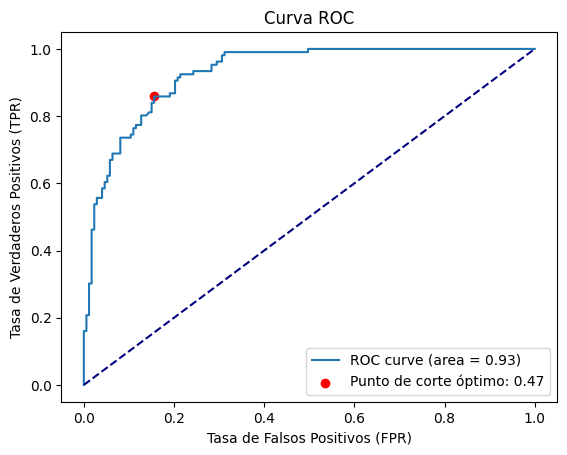

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las tasas de verdaderos positivos (tpr), falsos positivos (fpr) y los thresholds
fpr, tpr, thresholds = roc_curve(y1, EScore)

# Calcular la distancia a la diagonal (punto de corte óptimo puede maximizar tpr y minimizar fpr)
distancias = np.sqrt((1 - tpr)**2 + fpr**2)
punto_corte_optimo = thresholds[np.argmin(distancias)]

# Mostrar el AUC-ROC
auc = roc_auc_score(y1, EScore)
print(f'AUC-ROC: {auc}')
print(f'Punto de corte óptimo: {punto_corte_optimo}')

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.scatter(fpr[np.argmin(distancias)], tpr[np.argmin(distancias)], marker='o', color='red', label=f'Punto de corte óptimo: {punto_corte_optimo:.2f}')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()



In [ ]:
from sklearn.metrics import f1_score

# Calcular F1-Score para diferentes thresholds
f1_scores = [f1_score(y1, EScore >= threshold) for threshold in thresholds]

# Punto de corte que maximiza el F1-Score
threshold_max_f1 = thresholds[np.argmax(f1_scores)]
print(f'Punto de corte óptimo (F1-Score): {threshold_max_f1}')


Punto de corte óptimo (F1-Score): 0.45655362363742014


#Contrastamos con los datos test

In [ ]:
#Usamos sólo los datos de test
Datos2 = Datos[Datos['Sample']=='Test']
print(Datos2.head())

     User ID  Gender  Age  EstimatedSalary USD  Purchased Sample     Age S  \
4   15804002    Male   19                76000          0   Test -1.779569   
7   15694829  Female   32               150000          1   Test -0.539451   
9   15727311  Female   35                65000          0   Test -0.253270   
14  15628972    Male   18                82000          0   Test -1.874962   
15  15697686    Male   29                80000          0   Test -0.825632   

    EstimatedSal S  Unnamed: 8  Age Mean  Age SD  ES Mean  ES SD  
4         0.183521         NaN       NaN     NaN      NaN    NaN  
7         2.353802         NaN       NaN     NaN      NaN    NaN  
9        -0.139089         NaN       NaN     NaN      NaN    NaN  
14        0.359490         NaN       NaN     NaN      NaN    NaN  
15        0.300833         NaN       NaN     NaN      NaN    NaN  


In [ ]:
#Seleccionamos las variables
x21 = Datos2['Age S']
x22 = Datos2['EstimatedSal S']
x3 = np.column_stack((x21,x22))
y2 = Datos2['Purchased']

In [ ]:
#Predicción con datos test
proba_test = m1.predict_proba(x3)[:,1]
print(proba_test)

[0.00904918 0.70039751 0.15584802 0.00914664 0.08240484 0.34928341
 0.54734091 0.01851733 0.07847123 0.04266056 0.00551942 0.47976388
 0.00968079 0.03550196 0.00509832 0.00222313 0.09129754 0.04730084
 0.00314118 0.0368053  0.42038113 0.00299634 0.00276481 0.08612494
 0.10006642 0.01196903 0.08041609 0.04681603 0.09530265 0.29946077
 0.07763093 0.03970759 0.26594879 0.19937544 0.07322906 0.03200714
 0.73602522 0.05590612 0.38048658 0.35194219 0.59073828 0.27198514
 0.45163337 0.01042497 0.0102722  0.01302507 0.03200714 0.00135351
 0.00543814 0.15226928 0.10597924 0.21506947 0.01195879 0.06932254
 0.00723694 0.02546852 0.00355095 0.08605678 0.00364631 0.0908143
 0.04677738 0.19347158 0.01190017 0.55001809 0.99482973 0.78605445
 0.46629001 0.86056823 0.53827318 0.69124508 0.59073828 0.21874214
 0.32313945 0.97512495 0.67467397 0.9467145  0.22433539 0.19347158
 0.92845314 0.94217902 0.96600524 0.3048859  0.71752463 0.60591017
 0.98074503 0.44649824 0.52896421 0.85145664 0.90016426 0.12039

In [ ]:
#Aplicamos el punto de corte para convertir las probabilidades en clasificaciones binarias
punto_corte = .46
y_pred_test = (proba_test >= punto_corte).astype(int)
print(y_pred_test)

[0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1
 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1
 0 1 1 1 1 1 0 0 1 1]


#Procedemos con la matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

matriz_confusion = pd.crosstab(y2, y_pred_test, rownames=['Actual'], colnames=['Predicted'])
print(matriz_confusion)

Predicted   0   1
Actual           
0          72  12
1           6  31


In [ ]:
TN = matriz_confusion.iloc[0, 0]
FP = matriz_confusion.iloc[0, 1]
FN = matriz_confusion.iloc[1, 0]
TP = matriz_confusion.iloc[1, 1]

In [ ]:
#Calculamos las tasas y métricas
accuracy_score = accuracy_score(y2, y_pred_test)
precision_score = precision_score(y2, y_pred_test)
recall_score = recall_score(y2, y_pred_test)
f1_score = f1_score(y2, y_pred_test)
error = 1 - accuracy_score
tasa_verdaderos_positivos = TP / (TP + FN)
tasa_falsos_positivos = FP / (FP + TN)
tasa_verdaderos_negativos = TN / (TN + FP)
tasa_falsos_negativos = FN / (FN + TP)
print(f'Accuracy: {accuracy_score}')
print(f'Precision: {precision_score}')
print(f'Recall: {recall_score}')
print(f'F1-Score: {f1_score}')
print(f'Error: {error}')
print(f'Tasa de Verdaderos Positivos (TPR): {tasa_verdaderos_positivos}')
print(f'Tasa de Falsos Positivos (FPR): {tasa_falsos_positivos}')
print(f'Tasa de Verdaderos Negativos (TNR): {tasa_verdaderos_negativos}')
print(f'Tasa de Falsos Negativos (FNR): {tasa_falsos_negativos}')


Accuracy: 0.8512396694214877
Precision: 0.7209302325581395
Recall: 0.8378378378378378
F1-Score: 0.7749999999999999
Error: 0.14876033057851235
Tasa de Verdaderos Positivos (TPR): 0.8378378378378378
Tasa de Falsos Positivos (FPR): 0.14285714285714285
Tasa de Verdaderos Negativos (TNR): 0.8571428571428571
Tasa de Falsos Negativos (FNR): 0.16216216216216217


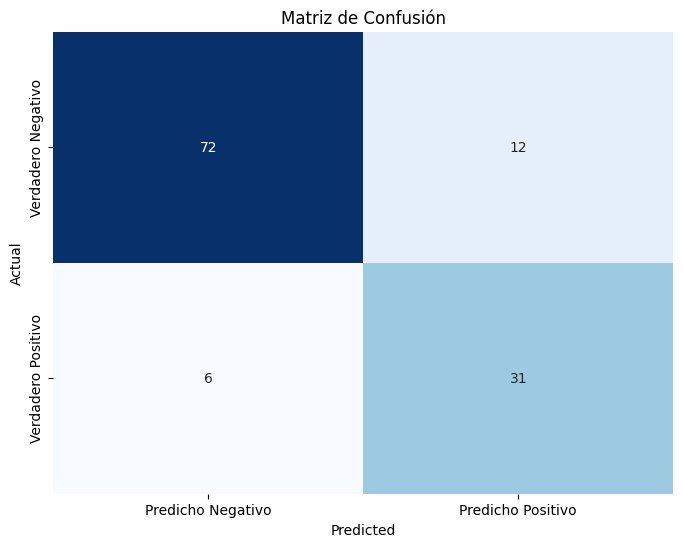

In [ ]:
#La graficamos
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicho Negativo','Predicho Positivo'],
            yticklabels=['Verdadero Negativo','Verdadero Positivo'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')

plt.show()

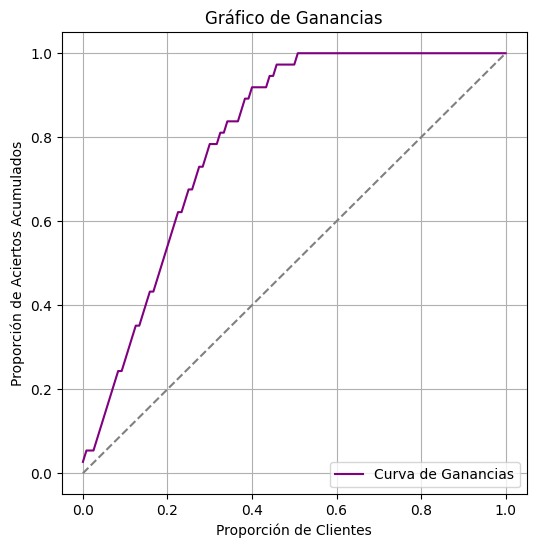

In [ ]:
#Gráfico de ganancias
from sklearn.metrics import roc_curve

# Ordenar las probabilidades y los valores verdaderos
indices_ordenados = np.argsort(proba_test)[::-1]
y_test_sorted = y2.iloc[indices_ordenados] # Use iloc to select rows by position
aciertos_acumulados = np.cumsum(y_test_sorted) / np.sum(y_test_sorted)

# Gráfico de ganancias
plt.figure(figsize=(6, 6))
plt.plot(np.linspace(0, 1, len(aciertos_acumulados)), aciertos_acumulados, label='Curva de Ganancias', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Línea base
plt.xlabel('Proporción de Clientes')
plt.ylabel('Proporción de Aciertos Acumulados')
plt.title('Gráfico de Ganancias')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
